# **Customer Churn Analysis and Prediction System**

## **Frame the Problem**


### **Business Context**
> In the telecom industry, customer retention is critical for sustaining profitability in an increasingly competitive market. Acquiring new customers is significantly more expensive than retaining existing ones. Thus, identifying customers likely to churn—and understanding the reasons behind their decision—is essential to developing targeted retention strategies.


### **Objective**
> The objective of this project is twofold:

> **Predict Customer Churn:** Build a robust machine learning model to classify whether a customer is likely to churn based on their demographic, service usage, billing behavior, and support interaction data.

> **Analyze Churn Drivers:** Derive actionable business insights by identifying key drivers of churn across various customer segments. Additionally, explore the reasons and categories of churn to enable targeted retention strategies.


### **Problem Type**
> **Primary:** Binary Classification – Predict if a customer will churn (Customer Status)

> **Secondary (Optional):** Multi-Class Classification – Predict churn reason (Churn Reason) and category (Churn Category)

## **Data Gathering**

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics")

Dataset URL: https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics


100%|██████████| 434k/434k [00:00<00:00, 304MB/s]

In [ ]:
# Importing requirements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("/content/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv", delimiter=',')
df.sample(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
5917,8329-IBCTI,Female,50,No,0,Cotati,94931,38.326215,-122.718742,0,1,Offer E,Yes,6.08,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Mailed Check,19.65,19.65,0.00,0,6.08,25.73,Churned,Competitor,Competitor made better offer
3075,4398-HSCJH,Female,57,No,0,Los Angeles,90013,34.044639,-118.240413,0,3,Offer E,Yes,3.64,Yes,Yes,DSL,25.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,63.60,155.65,0.00,0,10.92,166.57,Churned,Competitor,Competitor offered higher download speeds
6145,8707-RMEZH,Female,67,Yes,0,Tecate,91980,32.587557,-116.636816,6,69,NaN,Yes,34.55,No,Yes,Fiber Optic,19.0,Yes,Yes,No,No,No,Yes,No,Yes,One Year,No,Credit Card,87.30,6055.55,0.00,0,2383.95,8439.50,Stayed,NaN,NaN
5213,7336-RLLRH,Male,42,Yes,0,Oceanside,92054,33.351059,-117.420557,3,27,Offer C,Yes,11.83,Yes,Yes,DSL,14.0,Yes,No,No,Yes,Yes,Yes,Yes,Yes,One Year,No,Credit Card,80.85,2204.35,0.00,0,319.41,2523.76,Stayed,NaN,NaN
4421,6233-HXJMX,Female,42,No,0,Alpine,91901,32.827184,-116.703729,0,45,Offer B,Yes,13.82,Yes,Yes,Fiber Optic,8.0,No,No,Yes,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,89.30,4192.15,0.00,0,621.90,4814.05,Stayed,NaN,NaN
2891,4118-CEVPF,Female,74,No,0,Redwood City,94062,37.410567,-122.297152,0,35,NaN,Yes,32.92,Yes,Yes,Fiber Optic,22.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,One Year,Yes,Bank Withdrawal,110.80,3836.30,0.00,110,1152.20,5098.50,Stayed,NaN,NaN
5875,8261-GWDBQ,Female,70,Yes,0,Corona,92880,33.918043,-117.617809,1,60,NaN,Yes,4.06,Yes,Yes,Fiber Optic,11.0,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Two Year,Yes,Bank Withdrawal,116.05,6925.90,0.00,0,243.60,7169.50,Stayed,NaN,NaN
3614,5129-HHMZC,Female,64,Yes,0,Van Nuys,91401,34.178483,-118.431791,6,43,NaN,Yes,21.08,Yes,Yes,Cable,14.0,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Two Year,No,Credit Card,86.45,3574.50,0.00,0,906.44,4480.94,Stayed,NaN,NaN
1997,2883-ILGWO,Male,68,No,0,Compton,90222,33.912246,-118.236773,0,57,NaN,Yes,32.12,Yes,Yes,Fiber Optic,15.0,No,Yes,No,Yes,Yes,Yes,No,No,Two Year,Yes,Bank Withdrawal,104.90,5913.95,1.69,90,1830.84,7833.10,Stayed,NaN,NaN
2893,4121-AGSIN,Female,44,Yes,0,Ben Lomond,95005,37.078873,-122.090386,9,58,NaN,Yes,36.45,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,Yes,Credit Card,24.50,1497.90,9.22,0,2114.10,3602.78,Stayed,NaN,NaN


In [ ]:
df.shape

(7043, 38)

In [ ]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [ ]:
# Null values in terms of %
(df.isna().mean() * 100 ).sort_values(ascending=False)

,0
Churn Reason,73.463013
Churn Category,73.463013
Offer,55.047565
Online Backup,21.666903
Avg Monthly GB Download,21.666903
Online Security,21.666903
Streaming Movies,21.666903
Streaming TV,21.666903
Unlimited Data,21.666903
Streaming Music,21.666903


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated()]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason


## **Data Preprocessing**

In [ ]:
# Checking missing values

df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [ ]:
# converting the column names into lowercase and replace spaces with underscores

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
'''

offer

'''

'\n\noffer\n\n'

In [ ]:
df['offer'].unique()

array([nan, 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [ ]:
df['offer'].fillna('no offer', inplace=True)

In [ ]:
df['offer'].unique()

array(['no offer', 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [ ]:
'''

avg_monthly_long_distance_charges

'''

'\n\navg_monthly_long_distance_charges\n\n'

In [ ]:
df['avg_monthly_long_distance_charges'].unique()

array([42.39, 10.69, 33.65, ..., 10.04, 25.59,  2.01])

In [ ]:
df['avg_monthly_long_distance_charges'].fillna(0, inplace=True)

In [ ]:
df[df['avg_monthly_long_distance_charges'] == 0].shape

(682, 38)

In [ ]:
'''

multiple_lines

'''

'\n\nmultiple_lines\n\n'

In [ ]:
df[df['multiple_lines'].isnull()].shape

(682, 38)

In [ ]:
df['multiple_lines'].fillna('no', inplace=True)

In [ ]:
df[df['multiple_lines'].isnull()].shape

(0, 38)

In [ ]:
# internet related columns

internet_cols_cat = [
    'internet_type', 'online_security', 'online_backup', 'device_protection_plan',
    'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music',
    'unlimited_data'
]
internet_cols_num = ['avg_monthly_gb_download']

In [ ]:
for col in internet_cols_cat:
    df[col].fillna('no', inplace=True)

In [ ]:
for col in internet_cols_num:
    df[col].fillna(0, inplace=True)

In [ ]:
# convert 'zip_code' to string (categorical col)

df['zip_code'] = df['zip_code'].astype(str)

In [ ]:
# clean string columns by stripping whitespace and converting to lowercase

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

In [ ]:
# Encode target variable 'churn' from 'customer_status'

df['churn'] = df['customer_status'].apply(lambda x: 1 if x == 'churned' else 0)

In [ ]:
df[df['churn'].isnull()]

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,churn


In [ ]:
df['churn_reason'].unique()

array([nan, 'competitor had better devices', 'product dissatisfaction',
       'network reliability', 'limited range of services',
       'competitor made better offer', "don't know",
       'long distance charges', 'attitude of service provider',
       'attitude of support person',
       'competitor offered higher download speeds',
       'competitor offered more data',
       'lack of affordable download/upload speed', 'deceased', 'moved',
       'service dissatisfaction', 'price too high',
       'lack of self-service on website',
       'poor expertise of online support', 'extra data charges',
       'poor expertise of phone support'], dtype=object)

In [ ]:
# Dropping the unnecessary columns for model data that may help in creating the model

df_model = df.drop(columns=['customer_id', 'customer_status', 'churn_category', 'churn_reason'])

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   object 
 1   age                                7043 non-null   int64  
 2   married                            7043 non-null   object 
 3   number_of_dependents               7043 non-null   int64  
 4   city                               7043 non-null   object 
 5   zip_code                           7043 non-null   object 
 6   latitude                           7043 non-null   float64
 7   longitude                          7043 non-null   float64
 8   number_of_referrals                7043 non-null   int64  
 9   tenure_in_months                   7043 non-null   int64  
 10  offer                              7043 non-null   object 
 11  phone_service                      7043 non-null   objec

In [ ]:
df.to_csv('my_dataframe.csv', index=False)
df_model.to_csv('my_model_df.csv', index=False)

In [ ]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,churn
3714,5226-nozfc,male,48,no,0,modesto,95358,37.612612,-121.108568,0,26,no offer,yes,40.35,no,yes,fiber optic,13.0,no,yes,no,no,yes,no,no,yes,month-to-month,yes,bank withdrawal,85.75,2146.50,0.0,0,1049.10,3195.60,stayed,NaN,NaN,0
6951,9861-pdszp,female,19,no,0,delano,93215,35.772244,-119.209689,0,72,no offer,yes,10.05,yes,yes,fiber optic,82.0,no,yes,yes,yes,yes,yes,yes,yes,two year,yes,credit card,108.05,7806.60,0.0,0,723.60,8530.20,stayed,NaN,NaN,0
2475,3541-znuhk,female,51,yes,2,la crescenta,91214,34.239636,-118.245259,5,55,no offer,yes,20.10,yes,yes,fiber optic,19.0,yes,yes,no,no,no,no,no,yes,month-to-month,yes,bank withdrawal,85.10,4600.95,14.3,0,1105.50,5692.15,stayed,NaN,NaN,0
174,0280-xjgex,male,38,no,1,los angeles,90015,34.039224,-118.266293,0,49,no offer,yes,44.33,yes,yes,fiber optic,11.0,no,yes,yes,no,yes,yes,yes,yes,month-to-month,yes,bank withdrawal,103.70,5036.30,0.0,0,2172.17,7208.47,churned,competitor,competitor had better devices,1
3018,4318-rajvy,female,57,no,0,encino,91436,34.152875,-118.486056,0,10,no offer,yes,2.84,no,no,no,0.0,no,no,no,no,no,no,no,no,one year,yes,credit card,19.80,198.25,0.0,0,28.40,226.65,stayed,NaN,NaN,0
5126,7216-ewtrs,female,78,yes,0,newport beach,92663,33.622510,-117.927024,4,1,no offer,yes,17.35,yes,yes,fiber optic,23.0,no,no,yes,no,yes,yes,no,yes,month-to-month,yes,bank withdrawal,100.80,100.80,0.0,0,17.35,118.15,churned,attitude,attitude of service provider,1


## **EDA : Visualization**

#### **Univariate Analysis**

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

In [ ]:
numeric_columns

['age',
 'number_of_dependents',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'churn']

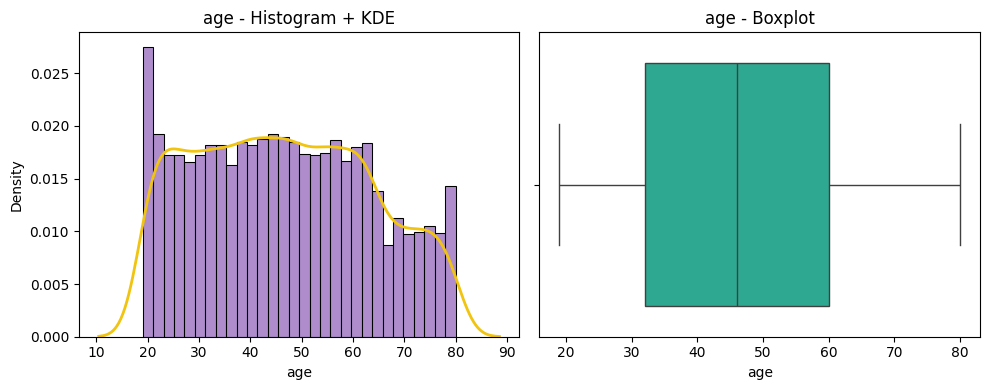

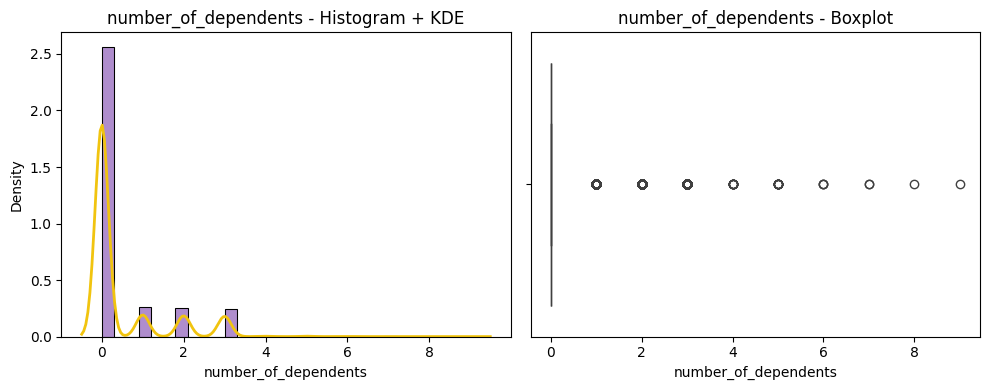

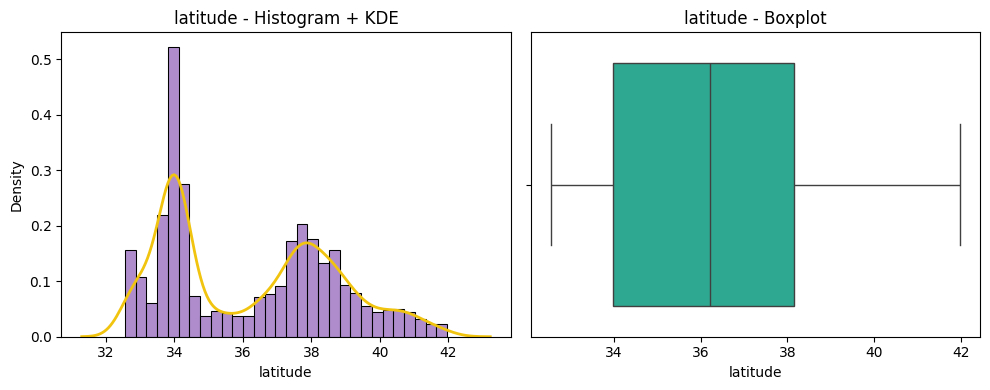

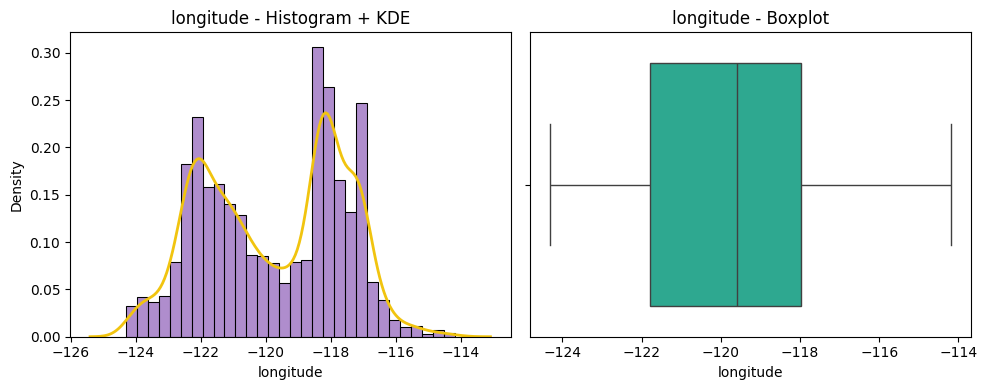

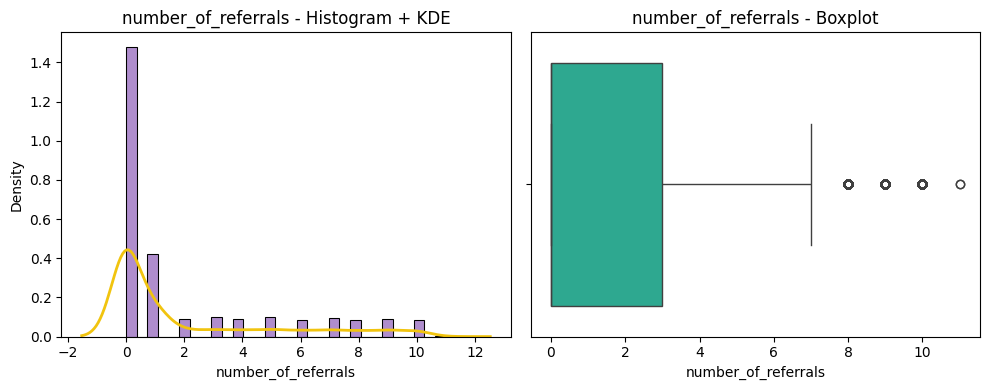

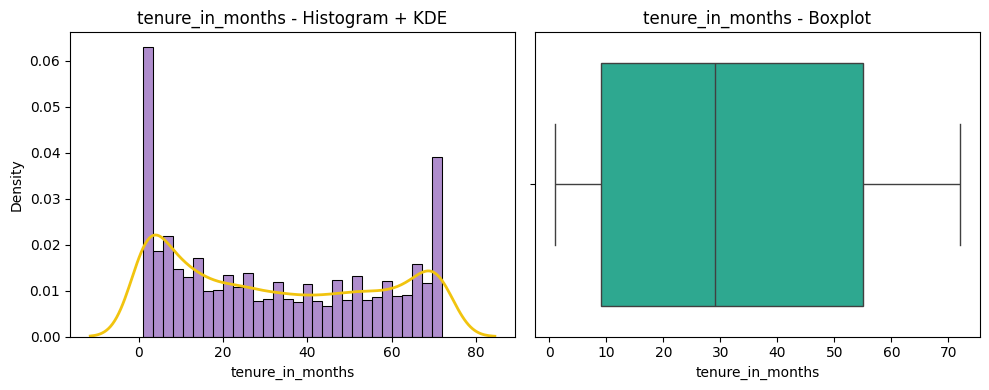

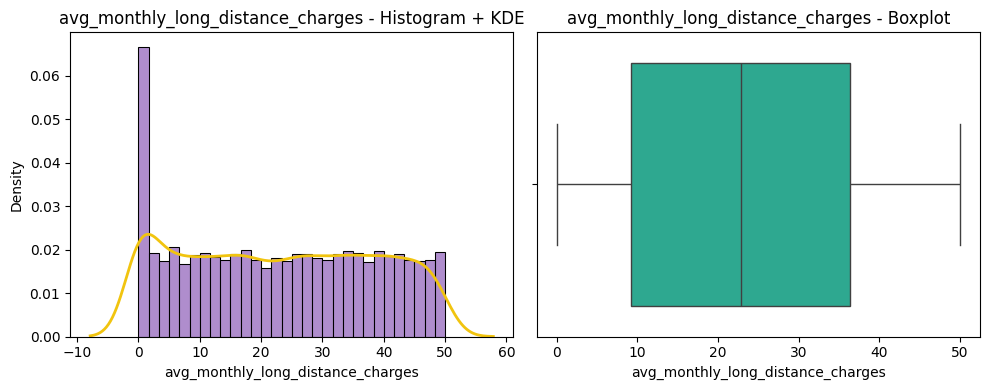

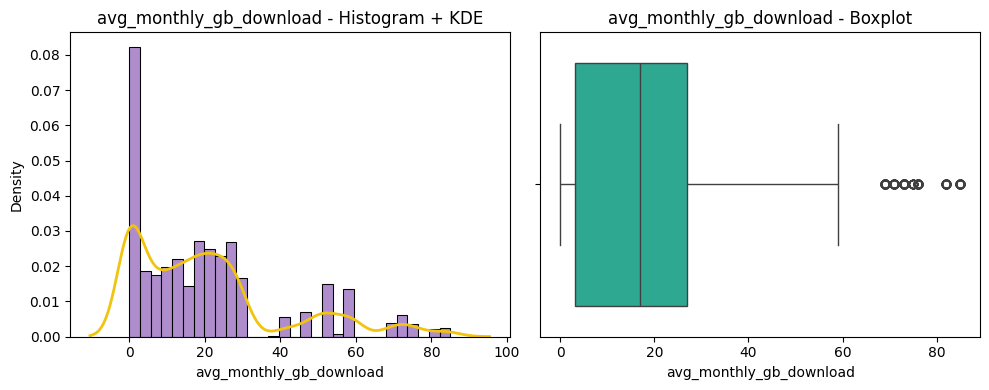

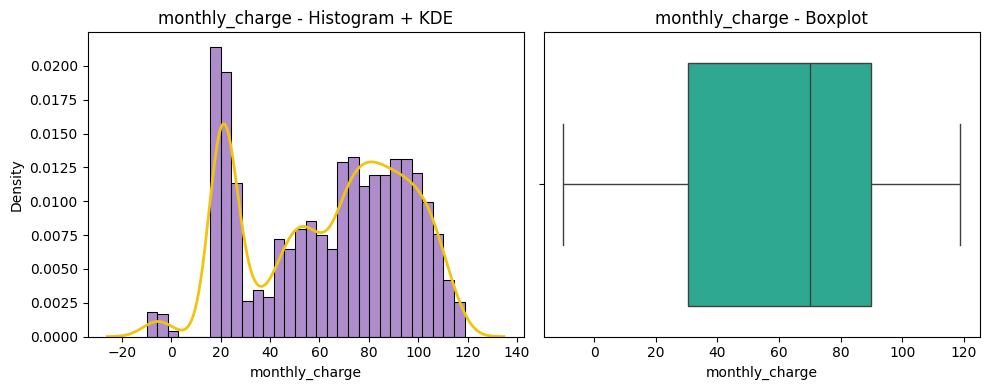

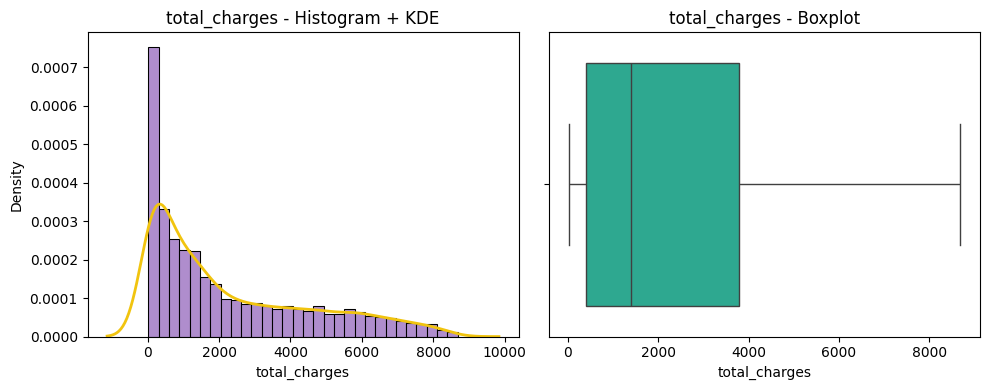

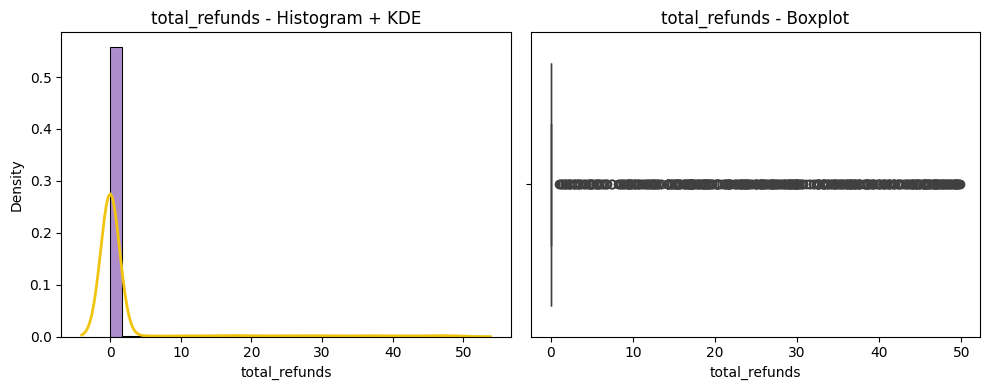

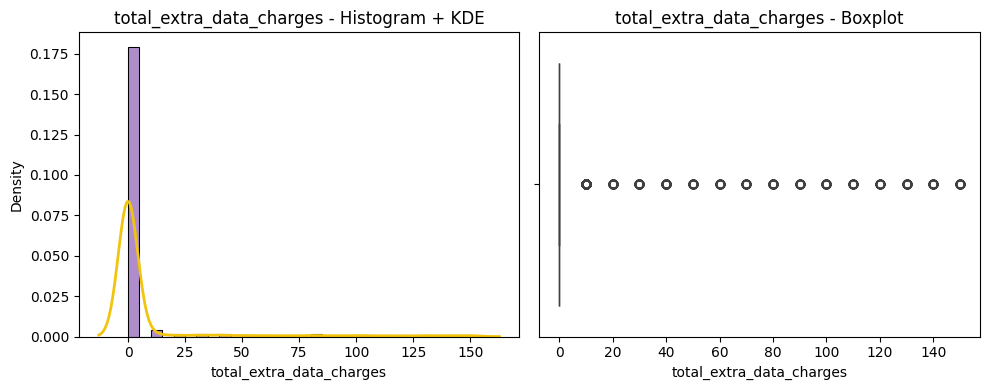

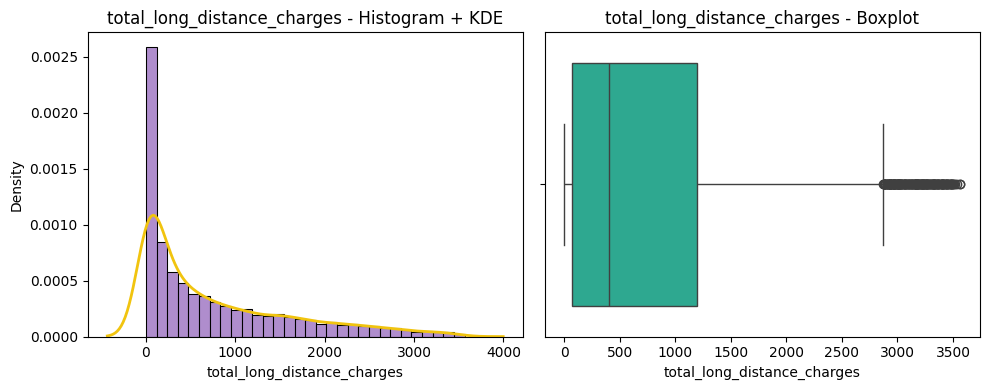

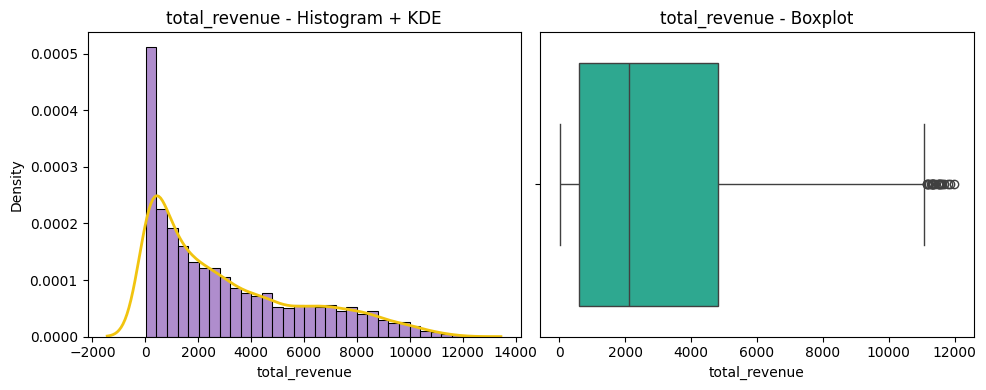

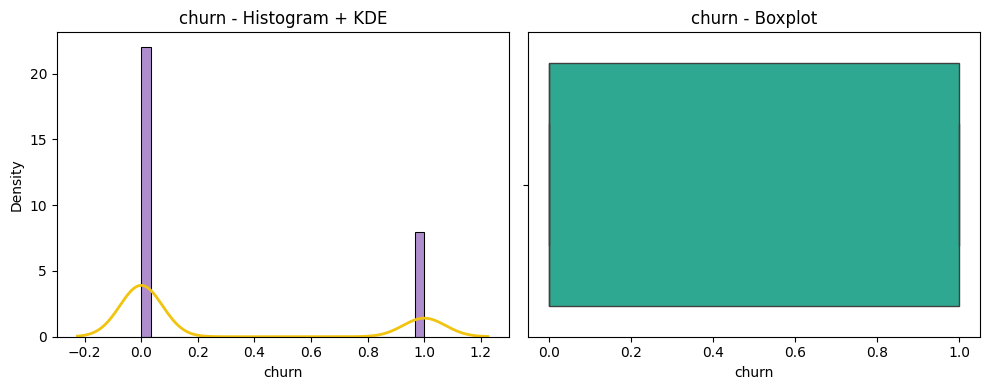

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(10, 4))

    data = pd.to_numeric(df[col], errors='coerce').dropna()

    plt.subplot(1, 2, 1)
    sns.histplot(data, color='#9467bd', bins=30, stat='density')  # density is important for overlay
    sns.kdeplot(data, color='#f1c40f', linewidth=2)
    plt.title(f'{col} - Histogram + KDE')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data, color='#1abc9c')
    plt.title(f'{col} - Boxplot')

    plt.tight_layout()
    plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
categorical_cols

['customer_id',
 'gender',
 'married',
 'city',
 'zip_code',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'customer_status',
 'churn_category',
 'churn_reason']

In [ ]:
categorical_cols = [col for col in categorical_cols if col not in ['zip_code', 'customer_id']]

In [ ]:
categorical_cols = [col for col in categorical_cols if col not in ['churn_reason', 'city']]

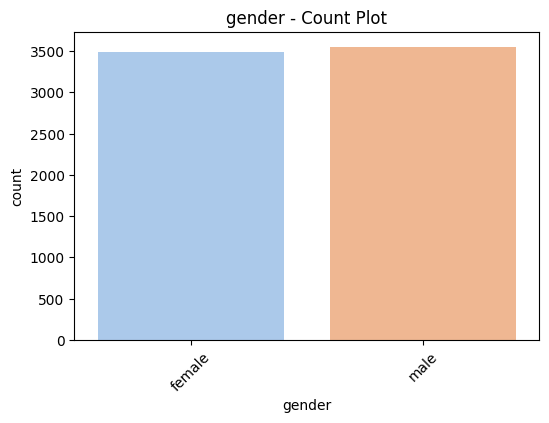

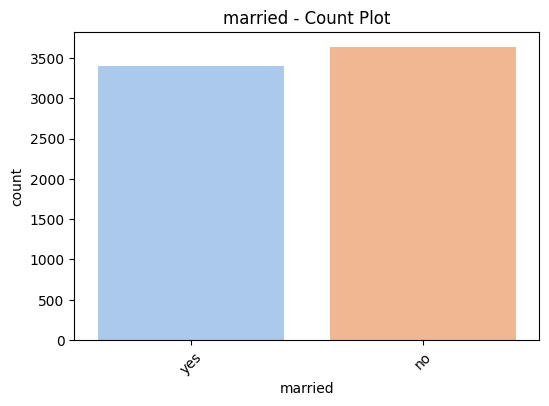

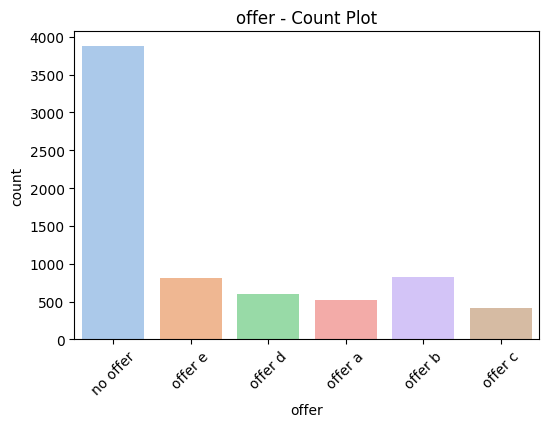

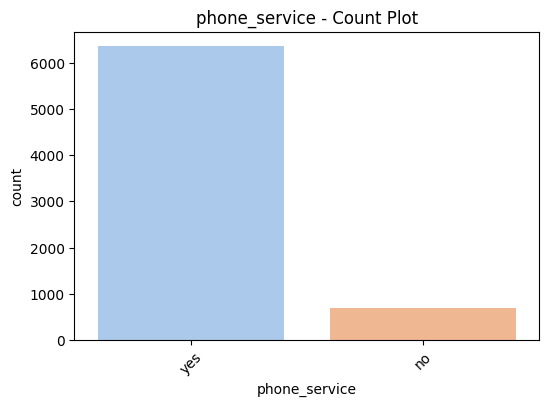

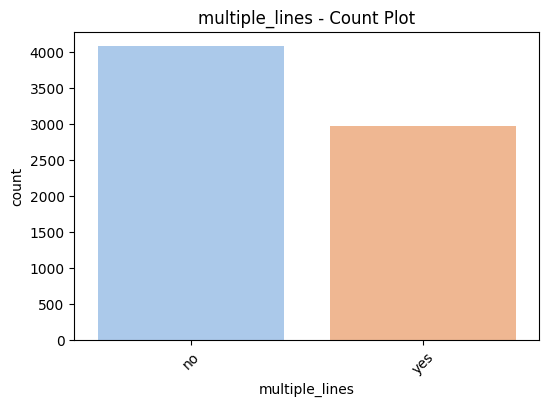

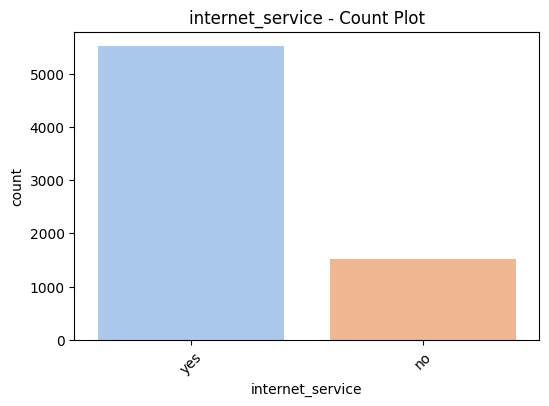

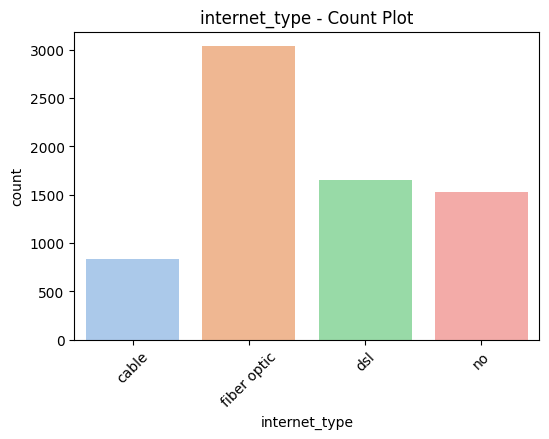

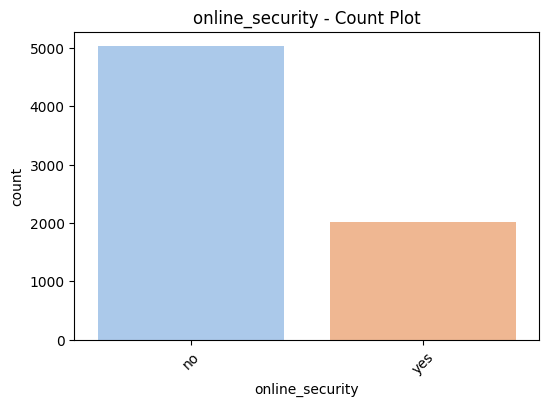

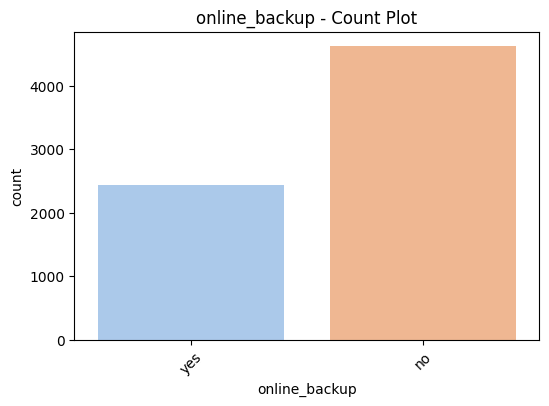

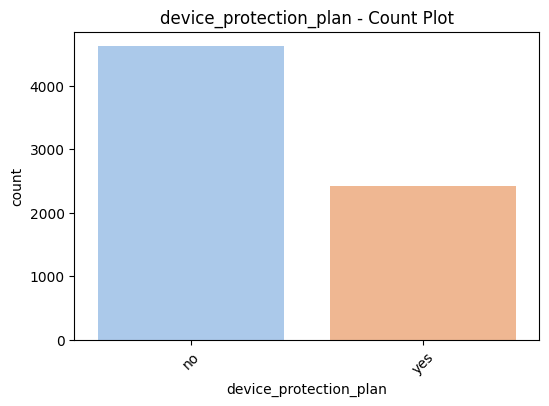

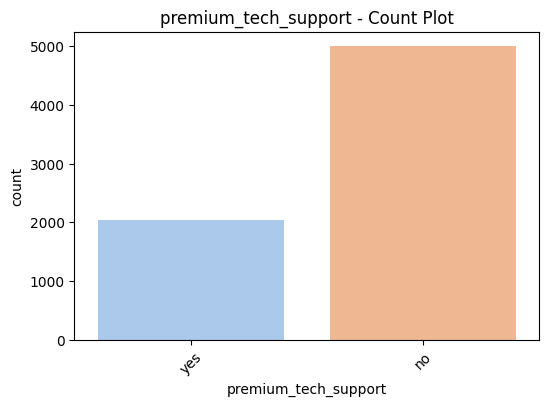

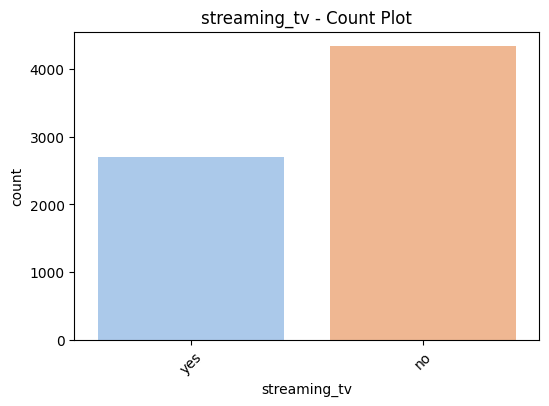

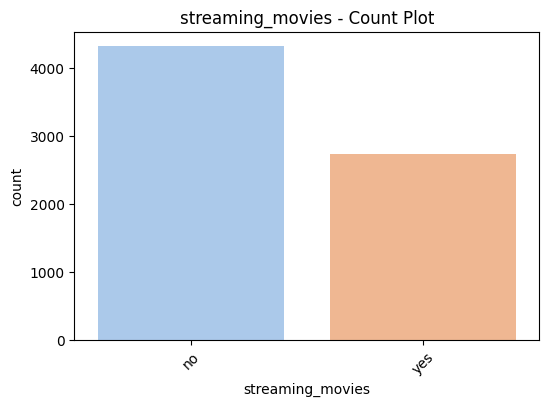

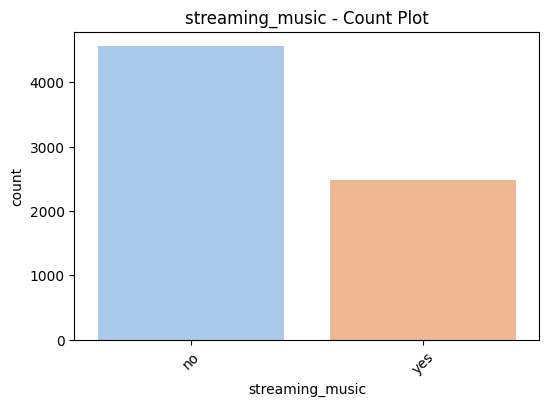

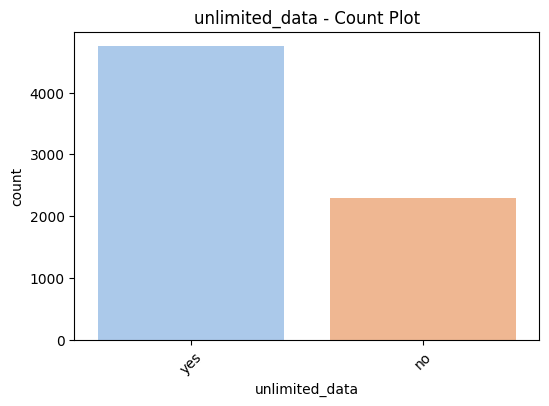

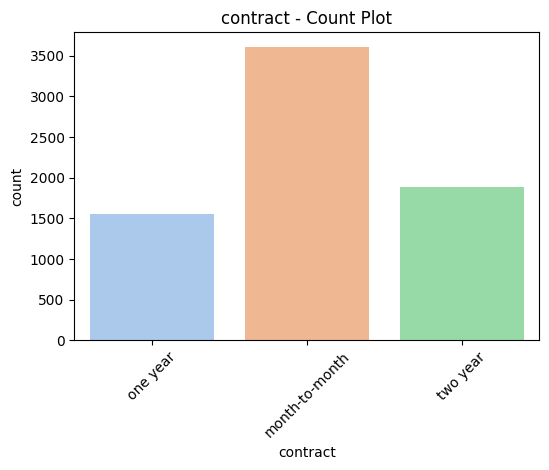

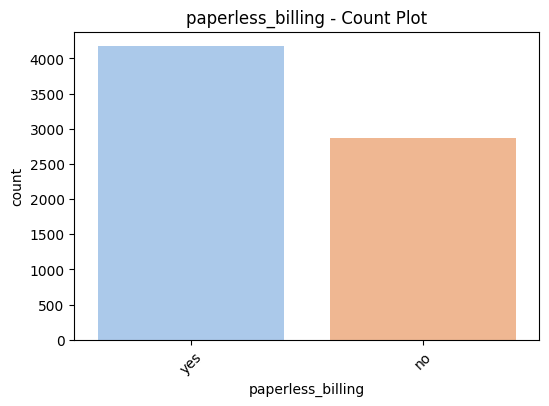

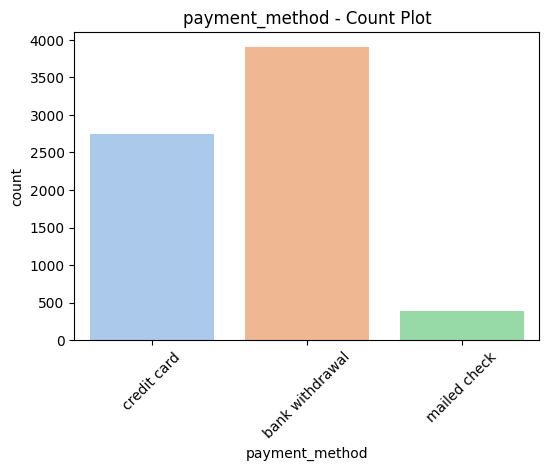

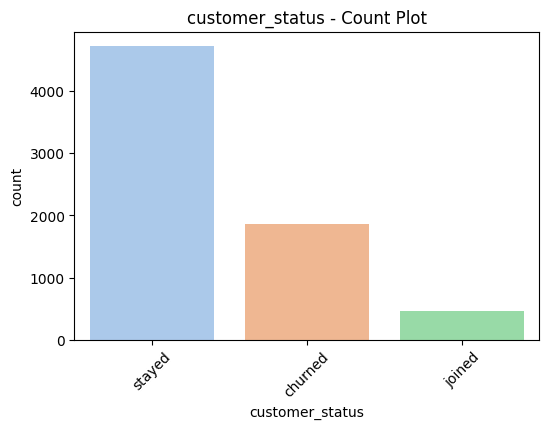

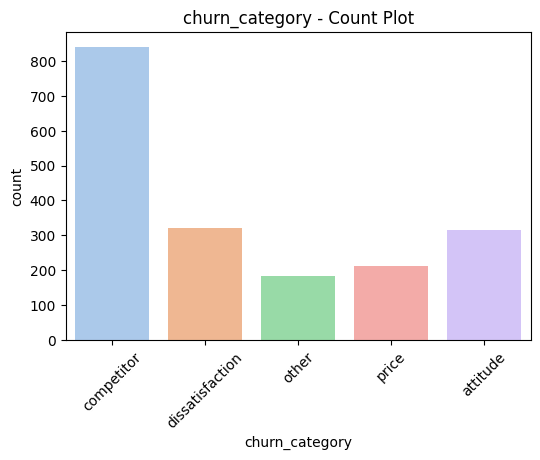

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'{col} - Count Plot')
    plt.xticks(rotation=45)
    plt.show()

#### **Bivariate Analysis**

In [ ]:
'''

Num to Num Columns

'''

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

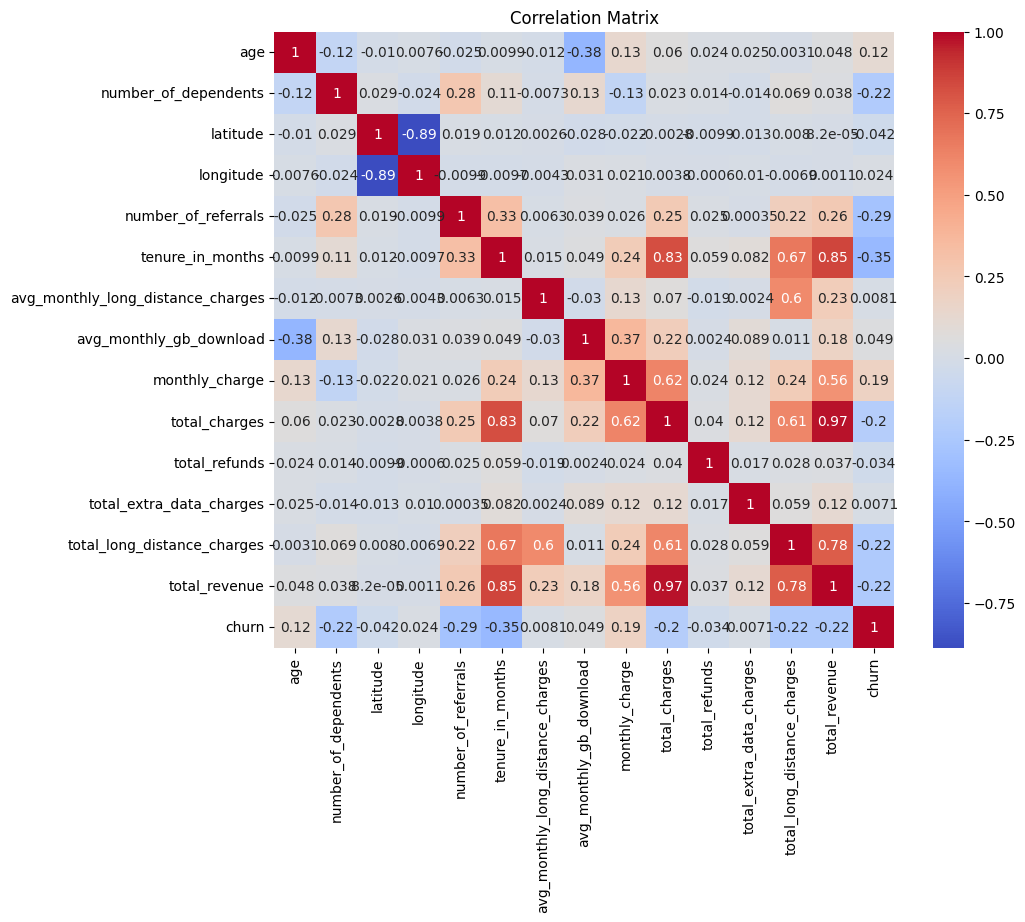

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
sns.set(style="whitegrid")

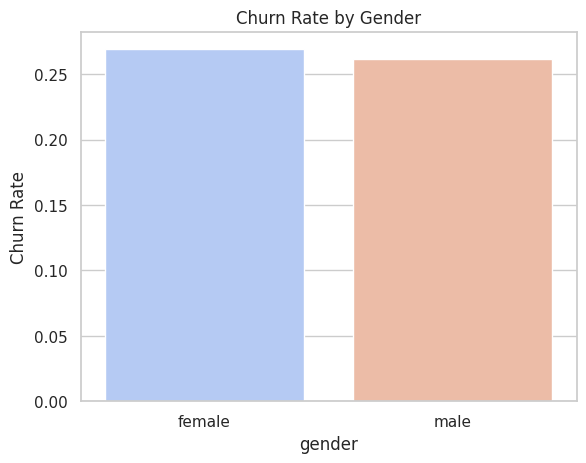

In [ ]:
# Churn Vs Gender

churn_gender = df.groupby('gender')['churn'].mean().reset_index()

sns.barplot(data=churn_gender, x='gender', y='churn', palette = 'coolwarm')
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.show()

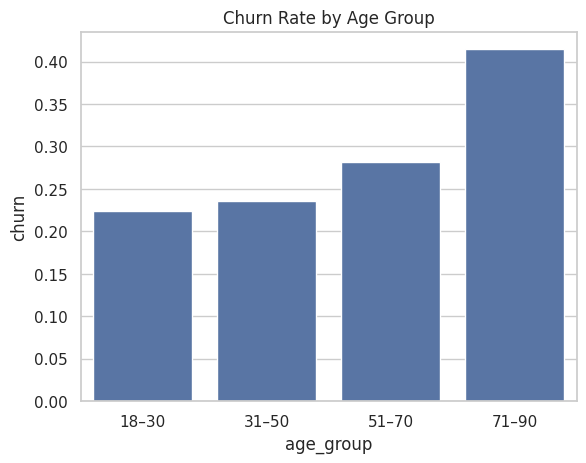

In [ ]:
# Churn Vs Age

df['age_group'] = pd.cut(df['age'], bins=[18,30,50,70,90], labels=['18–30', '31–50', '51–70', '71–90'])

churn_age = df.groupby('age_group')['churn'].mean().reset_index()


sns.barplot(data=churn_age, x='age_group', y='churn')
plt.title("Churn Rate by Age Group")
plt.show()

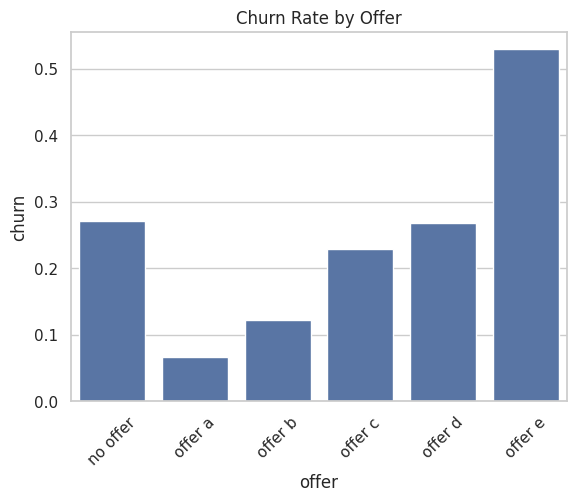

In [ ]:
# Churn Vs Offer

offer_churn = df.groupby('offer')['churn'].mean().reset_index()

sns.barplot(data=offer_churn, x='offer', y='churn')
plt.xticks(rotation=45)
plt.title("Churn Rate by Offer")
plt.show()

In [ ]:
df['tenure_in_months'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42])

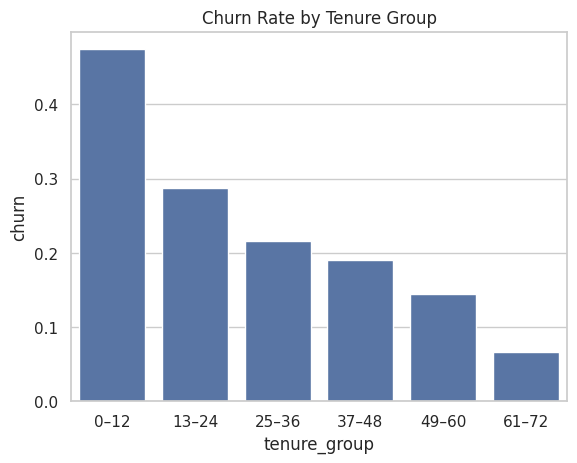

In [ ]:
# Churn Vs Tenure

df['tenure_group'] = pd.cut(df['tenure_in_months'], bins=[0,12,24,36,48,60,72], labels=["0–12","13–24","25–36","37–48","49–60","61–72"])

tenure_churn = df.groupby('tenure_group')['churn'].mean().reset_index()

sns.barplot(data=tenure_churn, x='tenure_group', y='churn')
plt.title("Churn Rate by Tenure Group")
plt.show()

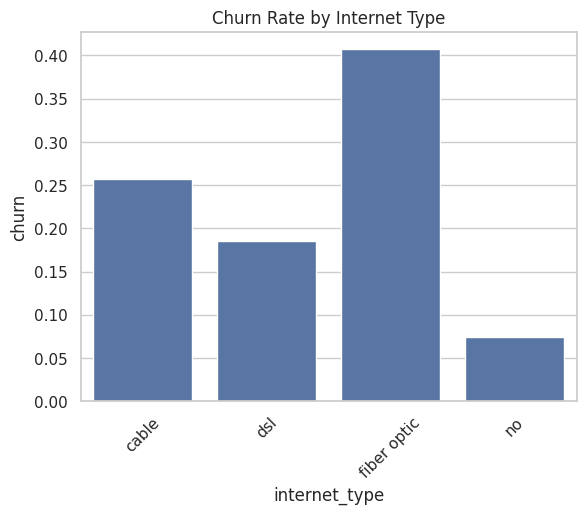

In [ ]:
# Churn Vs Internet Type

internet_churn = df.groupby('internet_type')['churn'].mean().reset_index()

sns.barplot(data=internet_churn, x='internet_type', y='churn')
plt.xticks(rotation=45)
plt.title("Churn Rate by Internet Type")
plt.show()

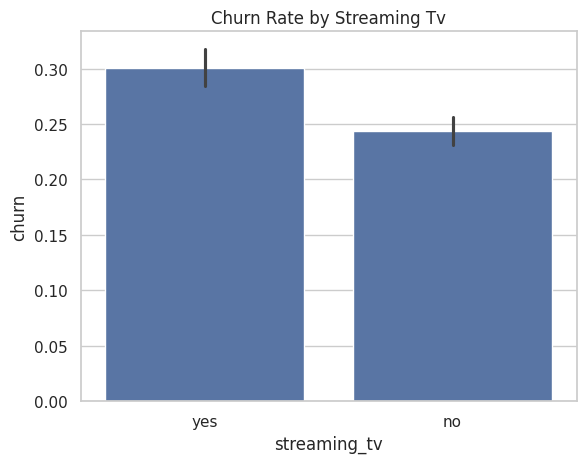

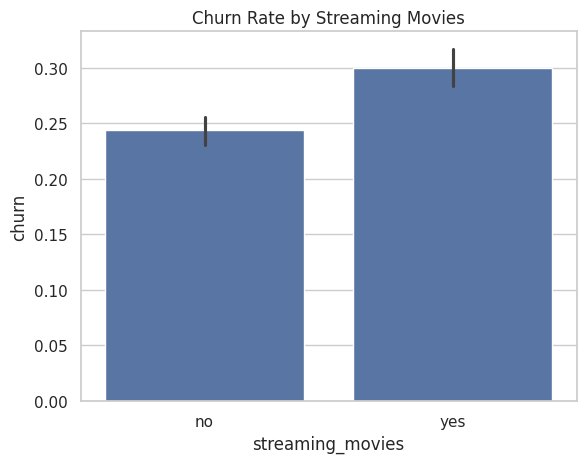

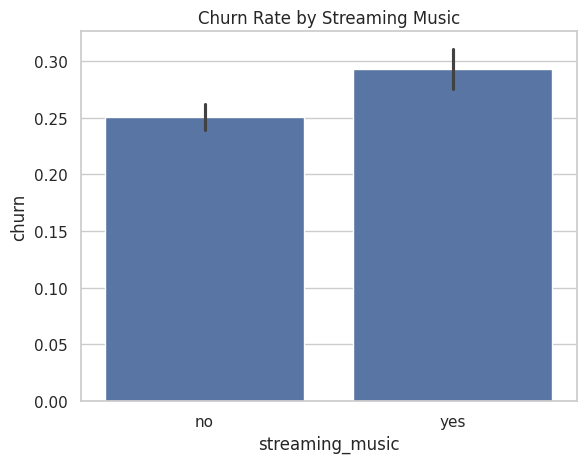

In [ ]:
# Churn vs Streaming Services

streaming_services = ['streaming_tv', 'streaming_movies', 'streaming_music']

for service in streaming_services:
    sns.barplot(data=df, x=service, y='churn')
    plt.title(f"Churn Rate by {service.replace('_', ' ').title()}")
    plt.show()

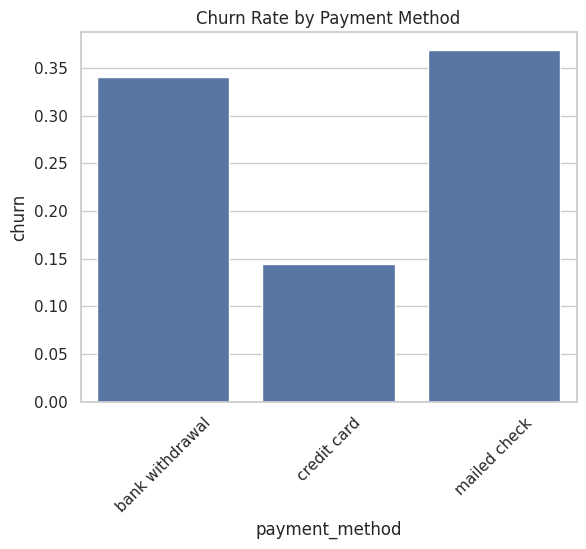

In [ ]:
# Churn vs Payment Method

payment_churn = df.groupby('payment_method')['churn'].mean().reset_index()

sns.barplot(data=payment_churn, x='payment_method', y='churn')
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.show()

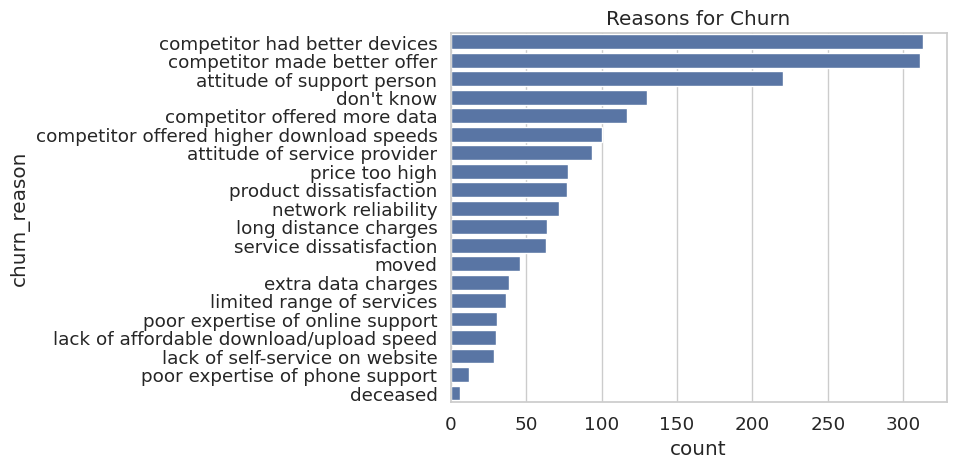

In [ ]:
# Churn Reason

sns.countplot(data=df[df['churn'] == 1], y='churn_reason', order=df['churn_reason'].value_counts().index)
plt.title("Reasons for Churn")
plt.show()

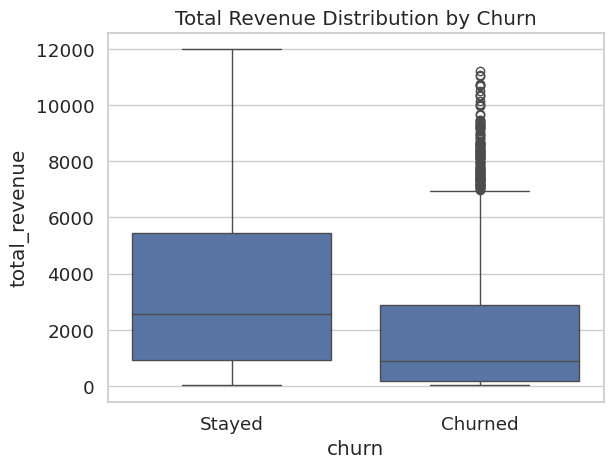

In [ ]:
# Total Revenue vs Churn

sns.boxplot(data=df, x='churn', y='total_revenue')
plt.title("Total Revenue Distribution by Churn")
plt.xticks([0, 1], ["Stayed", "Churned"])
plt.show()

#### **Multivariate Analysis**

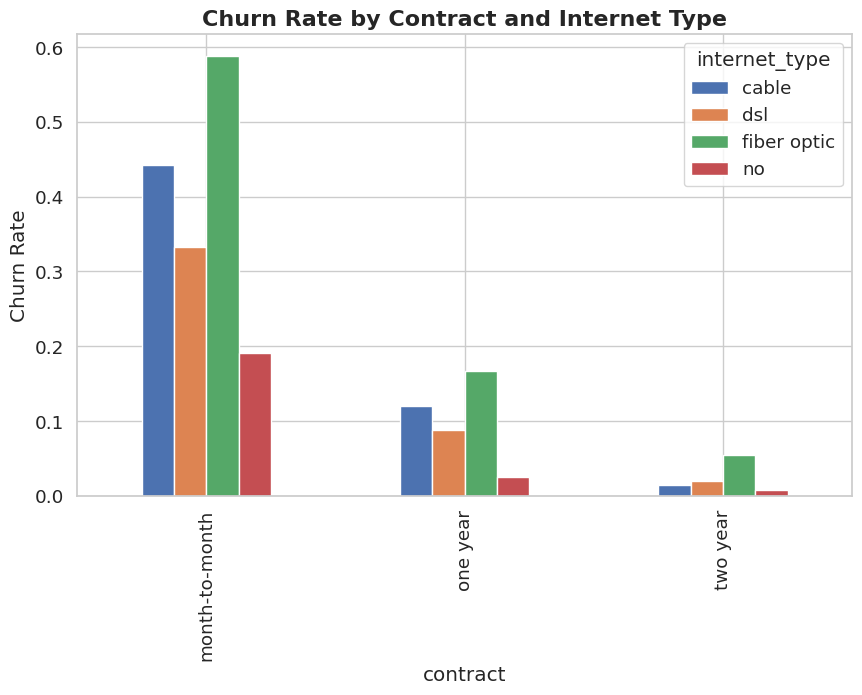

In [ ]:
# Contract Type vs Internet Type vs Churn

pivot_data = df.pivot_table(values='churn', index='contract', columns='internet_type')

pivot_data.plot(kind='bar', figsize=(10,6))
plt.title("Churn Rate by Contract and Internet Type", fontsize=16, weight='bold')
plt.ylabel("Churn Rate")
plt.show()

In [ ]:
df.head()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,churn,age_group,tenure_group
0,0002-orfbo,female,37,yes,0,frazier park,93225,34.827662,-118.999073,2,9,no offer,yes,42.39,no,yes,cable,16.0,no,yes,no,yes,yes,no,no,yes,one year,yes,credit card,65.6,593.30,0.00,0,381.51,974.81,stayed,NaN,NaN,0,31–50,0–12
1,0003-mknfe,male,46,no,0,glendale,91206,34.162515,-118.203869,0,9,no offer,yes,10.69,yes,yes,cable,10.0,no,no,no,no,no,yes,yes,no,month-to-month,no,credit card,-4.0,542.40,38.33,10,96.21,610.28,stayed,NaN,NaN,0,31–50,0–12
2,0004-tlhlj,male,50,no,0,costa mesa,92627,33.645672,-117.922613,0,4,offer e,yes,33.65,no,yes,fiber optic,30.0,no,no,yes,no,no,no,no,yes,month-to-month,yes,bank withdrawal,73.9,280.85,0.00,0,134.60,415.45,churned,competitor,competitor had better devices,1,31–50,0–12
3,0011-igkff,male,78,yes,0,martinez,94553,38.014457,-122.115432,1,13,offer d,yes,27.82,no,yes,fiber optic,4.0,no,yes,yes,no,yes,yes,no,yes,month-to-month,yes,bank withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,churned,dissatisfaction,product dissatisfaction,1,71–90,13–24
4,0013-exchz,female,75,yes,0,camarillo,93010,34.227846,-119.079903,3,3,no offer,yes,7.38,no,yes,fiber optic,11.0,no,no,no,yes,yes,no,no,yes,month-to-month,yes,credit card,83.9,267.40,0.00,0,22.14,289.54,churned,dissatisfaction,network reliability,1,71–90,0–12


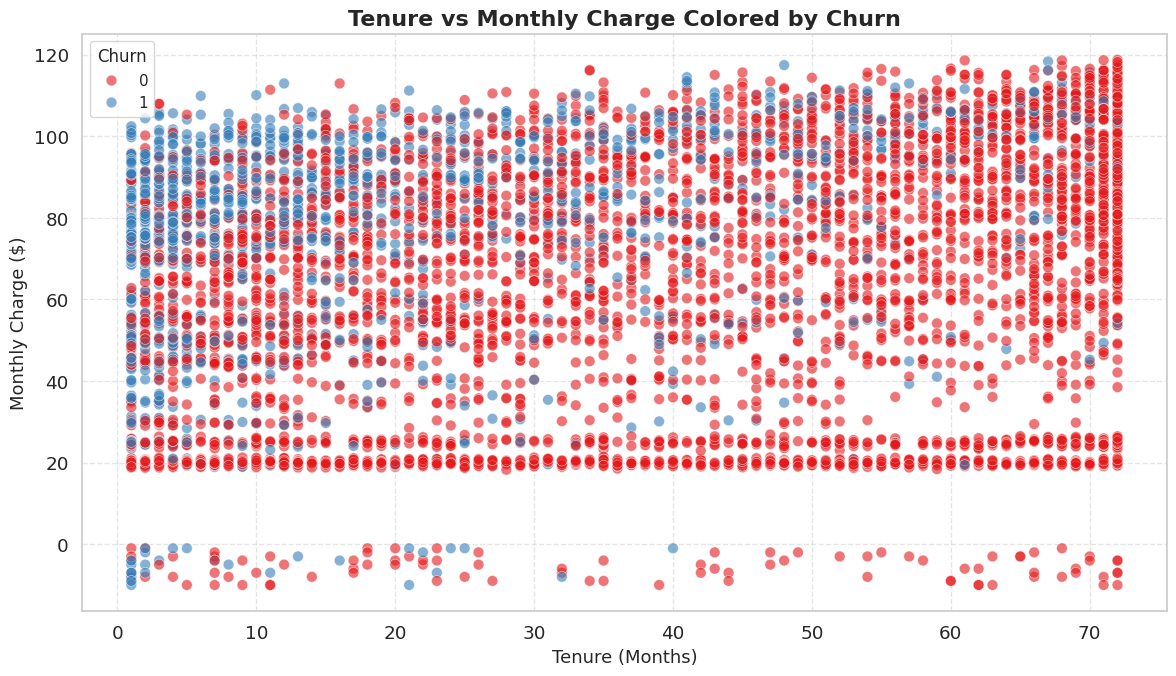

In [ ]:
# Tenure vs Monthly Charge

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='tenure_in_months',
    y='monthly_charge',
    hue='churn',
    palette='Set1',
    alpha=0.6,
    s=60,
    edgecolor='white',
    linewidth=0.5
)

plt.title("Tenure vs Monthly Charge Colored by Churn", fontsize=16, weight='bold')
plt.xlabel("Tenure (Months)", fontsize=13)
plt.ylabel("Monthly Charge ($)", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Churn', title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.show()

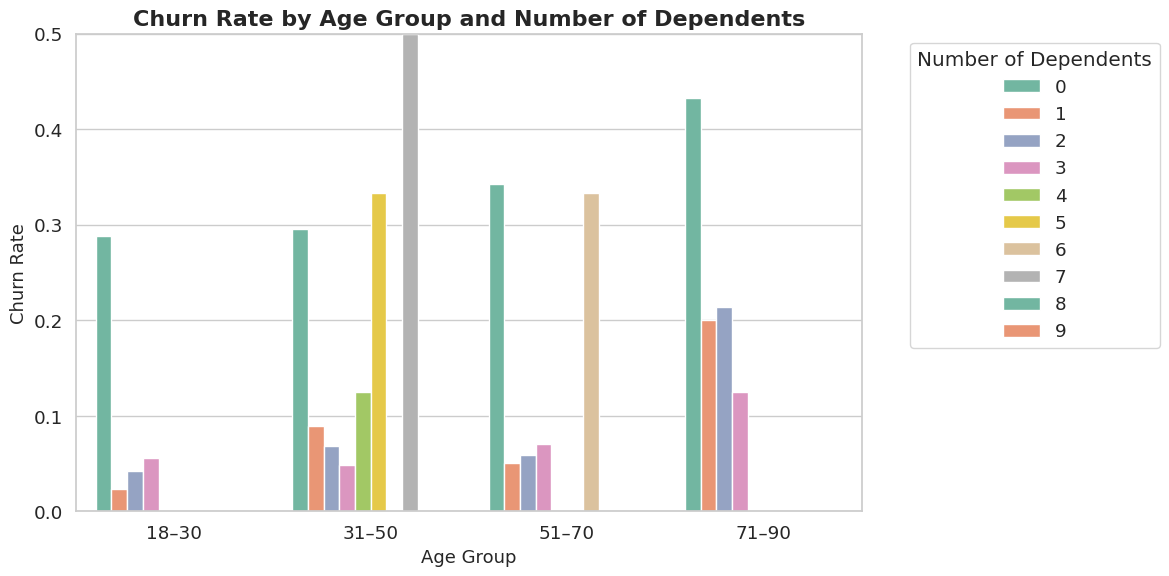

In [ ]:
age_dep = df.groupby(['age_group', 'number_of_dependents'])['churn'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=age_dep,
    x='age_group',
    y='churn',
    hue='number_of_dependents',
    palette='Set2'
)
plt.title("Churn Rate by Age Group and Number of Dependents", fontsize=16, weight='bold')
plt.xlabel("Age Group", fontsize=13)
plt.ylabel("Churn Rate", fontsize=13)
plt.ylim(0, 0.5)
plt.legend(title="Number of Dependents", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

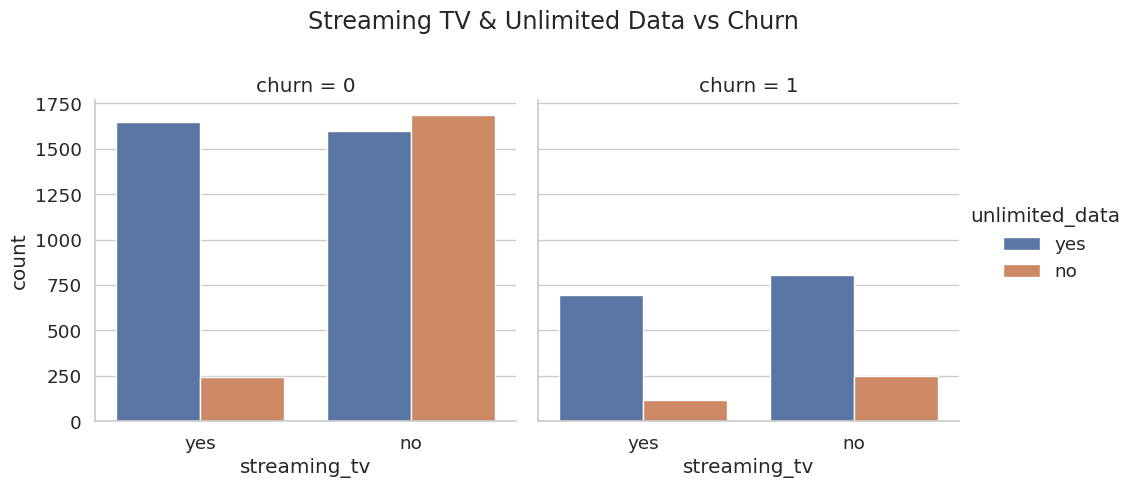

In [ ]:
# Streaming TV vs Unlimited Data vs Churn

sns.catplot(data=df, x='streaming_tv', hue='unlimited_data', col='churn', kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle("Streaming TV & Unlimited Data vs Churn")
plt.show()

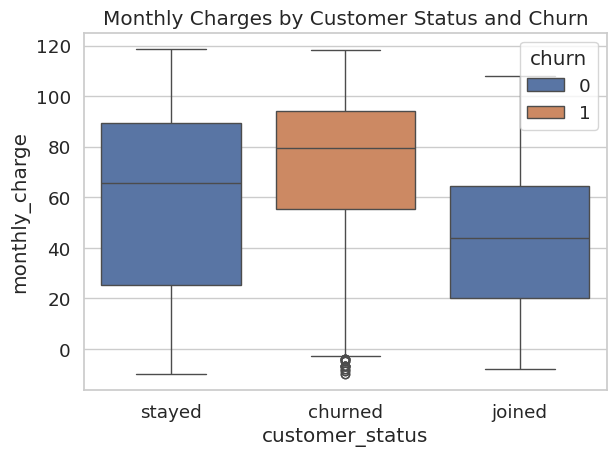

In [ ]:
# Customer Status vs Monthly Charge

sns.boxplot(data=df, x='customer_status', y='monthly_charge', hue='churn')
plt.title("Monthly Charges by Customer Status and Churn")
plt.tight_layout()
plt.show()

## **Feature Engineering**

In [ ]:
df_model.head()

,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn
0,female,37,yes,0,frazier park,93225,34.827662,-118.999073,2,9,no offer,yes,42.39,no,yes,cable,16.0,no,yes,no,yes,yes,no,no,yes,one year,yes,credit card,65.6,593.30,0.00,0,381.51,974.81,0
1,male,46,no,0,glendale,91206,34.162515,-118.203869,0,9,no offer,yes,10.69,yes,yes,cable,10.0,no,no,no,no,no,yes,yes,no,month-to-month,no,credit card,-4.0,542.40,38.33,10,96.21,610.28,0
2,male,50,no,0,costa mesa,92627,33.645672,-117.922613,0,4,offer e,yes,33.65,no,yes,fiber optic,30.0,no,no,yes,no,no,no,no,yes,month-to-month,yes,bank withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,male,78,yes,0,martinez,94553,38.014457,-122.115432,1,13,offer d,yes,27.82,no,yes,fiber optic,4.0,no,yes,yes,no,yes,yes,no,yes,month-to-month,yes,bank withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,female,75,yes,0,camarillo,93010,34.227846,-119.079903,3,3,no offer,yes,7.38,no,yes,fiber optic,11.0,no,no,no,yes,yes,no,no,yes,month-to-month,yes,credit card,83.9,267.40,0.00,0,22.14,289.54,1


In [ ]:
df_model.to_csv("telecom_churn_v2.csv", index=False)

In [ ]:
X = df_model.drop(columns='churn')
y = df_model['churn']

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Example custom feature: average revenue per month of tenure
        X['avg_revenue_per_month'] = X['total_revenue'] / (X['tenure_in_months'] + 1)
        X['refund_ratio'] = X['total_refunds'] / (X['total_charges'] + 1)
        return X


In [ ]:
numerical_cols = [
    'age', 'number_of_dependents', 'latitude', 'longitude',
    'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges',
    'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
    'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges',
    'total_revenue'
]

In [ ]:
categorical_cols = [
    'gender', 'married', 'city', 'zip_code', 'offer', 'phone_service',
    'multiple_lines', 'internet_service', 'internet_type', 'online_security',
    'online_backup', 'device_protection_plan', 'premium_tech_support',
    'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data',
    'contract', 'paperless_billing', 'payment_method'
]

In [ ]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [ ]:
full_pipeline = Pipeline([
    ('feature_constructor', FunctionTransformer(add_custom_features)),   # a) Feature Construction
    ('preprocessing', preprocessor),                                     # b) Feature Transformation
    ('dim_reduction', PCA(n_components=10)),                             # c) Feature Extraction
    ('feature_selection', SelectKBest(score_func=chi2, k=8))             # d) Feature Selection
])

In [ ]:
# ('classifier', RandomForestClassifier(random_state=42))

In [ ]:
# To display the pipeline in a digramatic way we can use this code.

from sklearn import set_config
set_config(display='diagram')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(X_train.columns)

Index(['gender', 'age', 'married', 'number_of_dependents', 'city', 'zip_code',
       'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months',
       'offer', 'phone_service', 'avg_monthly_long_distance_charges',
       'multiple_lines', 'internet_service', 'internet_type',
       'avg_monthly_gb_download', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charge',
       'total_charges', 'total_refunds', 'total_extra_data_charges',
       'total_long_distance_charges', 'total_revenue'],
      dtype='object')


In [ ]:
full_pipeline.fit(X_train, y_train)

KeyError: 'MonthlyCharges'

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('feature_engineering', full_pipeline),
        ('classifier', model)
    ])

    cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
    results[name] = np.mean(cv_scores)
    print(f"{name}: Mean CV Accuracy = {results[name]:.4f}")


# Identify the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.4f}")

## **Model Creation and Implementation of pipeline**

## **Model Evaluation**